In [1]:
# %gui qt
% matplotlib notebook
import numpy as np
import pandas as pd
import xarray as xr
# import pyqtgraph as pg

from matplotlib import pyplot as plt

# Old tests

In [ ]:
# class NpGridData(object):
    
#     def __str__(self):
#         n = self.name if self.name else 'Array'
#         info = f"{n} : {self.array.shape}"
#         for i, (n, c) in enumerate(self.coords):
#             info += "\n" + f"  {i} : {n} ({c.size})"
            
#         return info
    
#     @staticmethod
#     def validate(array, coords):
#         shp = array.shape
#         if coords is None:
#             coords = [(f'dim_{i}', np.arange(s)) for i, s in enumerate(shp)]
        
#         elif type(coords) == list and len(coords) == len(shp):
#             for i, c in enumerate(coords):
#                 if c is None:
#                     c = (f'dim_{i}', np.arange(shp[i]))
#                     coords[i] = c
                    
#                 n, v = c
#                 if len(v) != shp[i]:
#                     raise ValueError(f"Coordinate {i} ({n}) has length {len(v)} but should be {shp[i]}")
#         else:
#             raise ValueError("Did not understand coordinate format")
            
#         return array, coords
            
#     def __init__(self, array, coords=None, name=None):
#         self.array, self.coords = NpGridData.validate(array, coords)
#         self.name = name


# class Data(object):
    
#     def __init__(self, data=None, **kw):
#         self.data = data

# Using pandas with measurement data

## Converting from tabular data to pivoted DF

In [2]:
x = np.linspace(0, 10, 51)
y = np.linspace(-5, 5, 21)
w = np.array([0, 1])
xx, yy, ww = np.meshgrid(x, y, w, indexing='ij')
zz = np.cos(xx) * np.exp(-yy**2/2.) + ww

x1d, y1d, w1d, z1d = xx.reshape(-1,1), yy.reshape(-1,1), ww.reshape(-1,1), zz.reshape(-1,1)
df = pd.DataFrame(np.hstack((x1d, y1d, w1d, z1d)), columns=['x', 'y', 'w', 'z'])

df2 = df[df['w'] == 0].pivot('x', 'y')['z']

<IPython.core.display.Javascript object>


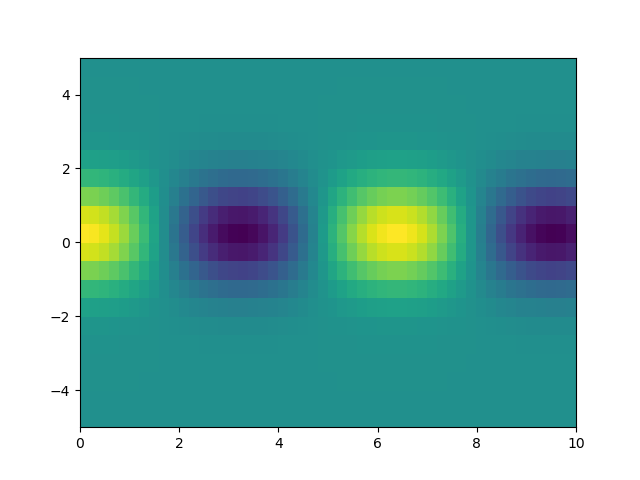

In [3]:
_x = df2.index.values
_y = df2.columns.values
_z = df2.values

fig, ax = plt.subplots(1,1)
ax.pcolormesh(_x, _y, _z.T)

## Converting from tabular data to Multi-index DF

In [55]:
x = np.linspace(0, np.pi * 2, 31)
y = np.linspace(-3, 3, 21)
w = np.array([0, 1])
xx, yy, ww = np.meshgrid(x, y, w, indexing='ij')
zz = np.cos(xx) * np.exp(-yy**2/2.) + ww
x1d, y1d, w1d, z1d = xx.reshape(-1), yy.reshape(-1), ww.reshape(-1), zz.reshape(-1)

index = pd.MultiIndex.from_tuples(list(zip(x1d, y1d, w1d)), names=['x', 'y', 'w'])
df = pd.DataFrame(z1d, index=index, columns=['z'])
# df

## ... and further to n-d XArray DataSet

In [56]:
ds = df.to_xarray()
ds

<xarray.Dataset>
Dimensions:  (w: 2, x: 31, y: 21)
Coordinates:
  * x        (x) float64 0.0 0.2094 0.4189 0.6283 0.8378 1.047 1.257 1.466 ...
  * y        (y) float64 -3.0 -2.7 -2.4 -2.1 -1.8 -1.5 -1.2 -0.9 -0.6 -0.3 ...
  * w        (w) int64 0 1
Data variables:
    z        (x, y, w) float64 0.01111 1.011 0.02612 1.026 0.05613 1.056 ...

In [57]:
da = ds['z'].loc[:, :, 0]
da

<xarray.DataArray 'z' (x: 31, y: 21)>
array([[0.011109, 0.026121, 0.056135, ..., 0.056135, 0.026121, 0.011109],
       [0.010866, 0.025551, 0.054908, ..., 0.054908, 0.025551, 0.010866],
       [0.010149, 0.023863, 0.051282, ..., 0.051282, 0.023863, 0.010149],
       ...,
       [0.010149, 0.023863, 0.051282, ..., 0.051282, 0.023863, 0.010149],
       [0.010866, 0.025551, 0.054908, ..., 0.054908, 0.025551, 0.010866],
       [0.011109, 0.026121, 0.056135, ..., 0.056135, 0.026121, 0.011109]])
Coordinates:
  * x        (x) float64 0.0 0.2094 0.4189 0.6283 0.8378 1.047 1.257 1.466 ...
  * y        (y) float64 -3.0 -2.7 -2.4 -2.1 -1.8 -1.5 -1.2 -0.9 -0.6 -0.3 ...
    w        int64 0

<IPython.core.display.Javascript object>


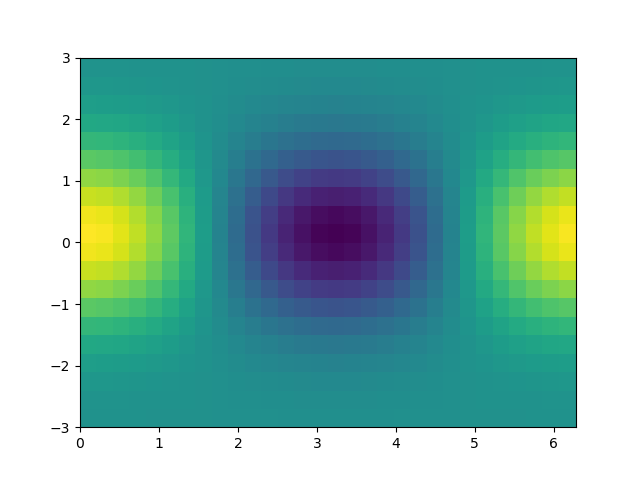

In [58]:
fig, ax = plt.subplots(1,1)
ax.pcolormesh(da.coords['x'].values, da.coords['y'].values, da.values.T)